# **VANCOUVER CRIME ANALYSIS PROJECT**

        GROUP 21

        NICOLE LINK
        TIRTH JOSHI
        ZAIN NOFAL



**LOADING IN THE DATA**

In [2]:
import kagglehub
import pandas as pd
import os

# Download latest version
path = kagglehub.dataset_download("wosaku/crime-in-vancouver")

print("Path to dataset files:", path)

Path to dataset files: /Users/tirthjoshi/.cache/kagglehub/datasets/wosaku/crime-in-vancouver/versions/2


In [3]:
df = pd.read_csv(os.path.join(path, "crime.csv"))
df.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude
0,Other Theft,2003,5,12,16.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
1,Other Theft,2003,5,7,15.0,20.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
2,Other Theft,2003,4,23,16.0,40.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
3,Other Theft,2003,4,20,11.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
4,Other Theft,2003,4,12,17.0,45.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530652 entries, 0 to 530651
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TYPE           530652 non-null  object 
 1   YEAR           530652 non-null  int64  
 2   MONTH          530652 non-null  int64  
 3   DAY            530652 non-null  int64  
 4   HOUR           476290 non-null  float64
 5   MINUTE         476290 non-null  float64
 6   HUNDRED_BLOCK  530639 non-null  object 
 7   NEIGHBOURHOOD  474028 non-null  object 
 8   X              530652 non-null  float64
 9   Y              530652 non-null  float64
 10  Latitude       530652 non-null  float64
 11  Longitude      530652 non-null  float64
dtypes: float64(6), int64(3), object(3)
memory usage: 48.6+ MB


In [5]:
df.describe()

,YEAR,MONTH,DAY,HOUR,MINUTE,X,Y,Latitude,Longitude
count,530652.000000,530652.000000,530652.000000,476290.000000,476290.000000,530652.000000,5.306520e+05,530652.000000,530652.000000
mean,2009.197956,6.450597,15.408590,13.711254,16.940039,441802.149909,4.897663e+06,44.216029,-110.495297
std,4.386272,3.399212,8.750642,6.767744,18.418950,149281.547656,1.654633e+06,14.938004,37.329862
min,2003.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-124.549757
25%,2005.000000,4.000000,8.000000,9.000000,0.000000,489944.452500,5.453651e+06,49.235573,-123.127194
50%,2009.000000,6.000000,15.000000,15.000000,10.000000,491499.240000,5.456840e+06,49.264251,-123.107128
75%,2013.000000,9.000000,23.000000,19.000000,30.000000,493547.210000,5.458638e+06,49.280441,-123.065932
max,2017.000000,12.000000,31.000000,23.000000,59.000000,511303.000000,5.512579e+06,49.755314,0.000000


In [6]:
# Checking missing values
df.isna().sum()


TYPE                 0
YEAR                 0
MONTH                0
DAY                  0
HOUR             54362
MINUTE           54362
HUNDRED_BLOCK       13
NEIGHBOURHOOD    56624
X                    0
Y                    0
Latitude             0
Longitude            0
dtype: int64

In [7]:
#Since there are large amount of missing values for the time, we can replace them with the mode
hour_mode = df["HOUR"].mode()[0]
minute_mode = df["MINUTE"].mode()[0]

df["HOUR"].fillna(hour_mode, inplace = True)
df["MINUTE"].fillna(minute_mode, inplace =True)

/var/folders/x8/23w6dpj14gq74kxpxz3wckg80000gn/T/ipykernel_18657/1683169243.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["HOUR"].fillna(hour_mode, inplace = True)
/var/folders/x8/23w6dpj14gq74kxpxz3wckg80000gn/T/ipykernel_18657/1683169243.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

In [8]:
df["NEIGHBOURHOOD"].fillna("Unknown", inplace=True)

/var/folders/x8/23w6dpj14gq74kxpxz3wckg80000gn/T/ipykernel_18657/3012169511.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["NEIGHBOURHOOD"].fillna("Unknown", inplace=True)


**Visualizations**

In [9]:
import altair as alt
alt.data_transformers.enable("vegafusion")

alt.Chart(df).mark_bar().encode(
     y=alt.Y('TYPE:N', sort='-x', title='Crime Type'),
     x = alt.X('count()', title = 'Number of Crimes')
).properties(
    title = 'Distribution of Crime Types',
    width = 800
    )


/Users/tirthjoshi/miniforge3/envs/522/lib/python3.12/site-packages/altair/utils/data.py:71: UserWarning: You passed a `<class 'narwhals.stable.v1.DataFrame'>` to `is_pandas_dataframe`.

Hint: Instead of e.g. `is_pandas_dataframe(df)`, did you mean `is_pandas_dataframe(df.to_native())`?
  return _is_pandas_dataframe(obj) or isinstance(


alt.Chart(...)

In [10]:
alt.Chart(df).mark_line(point=True).encode(
    x=alt.X('YEAR:O', title='Year'),
    y=alt.Y('count()', title='Number of Crimes')
    ).properties(
    title='Crime Trend Over Years',
    width=800
)


/Users/tirthjoshi/miniforge3/envs/522/lib/python3.12/site-packages/altair/utils/data.py:71: UserWarning: You passed a `<class 'narwhals.stable.v1.DataFrame'>` to `is_pandas_dataframe`.

Hint: Instead of e.g. `is_pandas_dataframe(df)`, did you mean `is_pandas_dataframe(df.to_native())`?
  return _is_pandas_dataframe(obj) or isinstance(


alt.Chart(...)

In [11]:
alt.Chart(df).mark_bar().encode(
    x=alt.X('HOUR:O', title='Hour of Day'),
    y=alt.Y('count()', title='Number of Crimes'),
).properties(
    title='Crimes by Hour of Day',
    width=600
)

/Users/tirthjoshi/miniforge3/envs/522/lib/python3.12/site-packages/altair/utils/data.py:71: UserWarning: You passed a `<class 'narwhals.stable.v1.DataFrame'>` to `is_pandas_dataframe`.

Hint: Instead of e.g. `is_pandas_dataframe(df)`, did you mean `is_pandas_dataframe(df.to_native())`?
  return _is_pandas_dataframe(obj) or isinstance(


alt.Chart(...)

In [12]:

chart = alt.Chart(df).mark_bar().encode(
    y=alt.Y('NEIGHBOURHOOD:N', sort='-x', title='Neighbourhood'),
    x=alt.X('count()', title='Number of Crimes'),
).properties(
    title='Top 10 Neighbourhoods by Crime Count',
    width=700,
    height=400
)

chart


/Users/tirthjoshi/miniforge3/envs/522/lib/python3.12/site-packages/altair/utils/data.py:71: UserWarning: You passed a `<class 'narwhals.stable.v1.DataFrame'>` to `is_pandas_dataframe`.

Hint: Instead of e.g. `is_pandas_dataframe(df)`, did you mean `is_pandas_dataframe(df.to_native())`?
  return _is_pandas_dataframe(obj) or isinstance(


alt.Chart(...)

In [13]:
import folium

# centering the map around vancouver
m = folium.Map(location=[49.2827, -123.1207], zoom_start=12)

# adding markers for the first 2000 to avoid it being crowded
for idx, row in df.head(2000).iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=3,
        color='red',
        fill=True,
        fill_opacity=0.5,
        popup=f"{row['TYPE']} - {row['NEIGHBOURHOOD']}"
    ).add_to(m)

m


# PRE-PROCESSING & TRANSFORMATION

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (classification_report, confusion_matrix, 
                              accuracy_score, f1_score, ConfusionMatrixDisplay)
from sklearn.model_selection import cross_val_score, GridSearchCV
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [15]:
# Create a working copy
df_processed = df.copy()

# create a proper datetime column
df_processed['DATETIME'] = pd.to_datetime(
    df_processed['YEAR'].astype(str) + '-' + 
    df_processed['MONTH'].astype(str) + '-' + 
    df_processed['DAY'].astype(str) + ' ' + 
    df_processed['HOUR'].astype(int).astype(str) + ':' + 
    df_processed['MINUTE'].astype(int).astype(str)
)

# Extract day of week (0=Monday, 6=Sunday)
df_processed['DAY_OF_WEEK'] = df_processed['DATETIME'].dt.dayofweek

# Create weekend indicator
df_processed['IS_WEEKEND'] = (df_processed['DAY_OF_WEEK'] >= 5).astype(int)

# Time of day categories
def categorize_time(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 22:
        return 'Evening'
    else:
        return 'Night'

df_processed['TIME_OF_DAY'] = df_processed['HOUR'].astype(int).apply(categorize_time)

# Season from month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df_processed['SEASON'] = df_processed['MONTH'].apply(get_season)

# Cyclical encoding for time features
df_processed['HOUR_SIN'] = np.sin(2 * np.pi * df_processed['HOUR'].astype(int) / 24)
df_processed['HOUR_COS'] = np.cos(2 * np.pi * df_processed['HOUR'].astype(int) / 24)
df_processed['MONTH_SIN'] = np.sin(2 * np.pi * df_processed['MONTH'] / 12)
df_processed['MONTH_COS'] = np.cos(2 * np.pi * df_processed['MONTH'] / 12)

# Rush hour indicator (morning and evening commute)
df_processed['IS_RUSH_HOUR'] = df_processed['HOUR'].astype(int).apply(
    lambda x: 1 if (7 <= x <= 9) or (16 <= x <= 18) else 0
)

# Late night indicator
df_processed['IS_LATE_NIGHT'] = df_processed['HOUR'].astype(int).apply(
    lambda x: 1 if (x >= 22 or x <= 4) else 0
)

# Distance from downtown Vancouver (approximate coordinates)
downtown_x = 491500
downtown_y = 5459000
df_processed['DIST_FROM_DOWNTOWN'] = np.sqrt(
    (df_processed['X'] - downtown_x)**2 + 
    (df_processed['Y'] - downtown_y)**2
)

print("Feature Engineering Complete")
print(f"Original columns: {len(df.columns)}")
print(f"New columns: {len(df_processed.columns)}")
print(f"Features added: {len(df_processed.columns) - len(df.columns)}")

Feature Engineering Complete
Original columns: 12
New columns: 24
Features added: 12


In [16]:
# Check distribution of crime types
crime_counts = df_processed['TYPE'].value_counts()
print("Top 10 Crime Types:")
print(crime_counts.head(10))
print(f"\nTotal crime types in dataset: {len(crime_counts)}")

# Selecting top 4 crime types
n_classes = 4
selected_crimes = crime_counts.head(n_classes).index.tolist()

print(f"\nSelected {n_classes} crime types for classification:")
for i, crime in enumerate(selected_crimes, 1):
    pct = (crime_counts[crime] / len(df_processed)) * 100
    print(f"{i}. {crime}: {crime_counts[crime]:,} ({pct:.1f}%)")

# Filter dataset
df_model = df_processed[df_processed['TYPE'].isin(selected_crimes)].copy()

print(f"\nFiltered dataset size: {len(df_model):,} records")
print(f"This represents {len(df_model)/len(df_processed)*100:.1f}% of all crimes")

Top 10 Crime Types:
TYPE
Theft from Vehicle                                        172700
Mischief                                                   70413
Break and Enter Residential/Other                          60862
Offence Against a Person                                   54142
Other Theft                                                52167
Theft of Vehicle                                           38418
Break and Enter Commercial                                 33845
Theft of Bicycle                                           25730
Vehicle Collision or Pedestrian Struck (with Injury)       21901
Vehicle Collision or Pedestrian Struck (with Fatality)       254
Name: count, dtype: int64

Total crime types in dataset: 11

Selected 4 crime types for classification:
1. Theft from Vehicle: 172,700 (32.5%)
2. Mischief: 70,413 (13.3%)
3. Break and Enter Residential/Other: 60,862 (11.5%)
4. Offence Against a Person: 54,142 (10.2%)

Filtered dataset size: 358,117 records
This represents 6

In [17]:
# Define our feature sets
numeric_cols = [
    'HOUR', 'DAY_OF_WEEK', 'MONTH', 'DAY',
    'IS_WEEKEND', 'IS_RUSH_HOUR', 'IS_LATE_NIGHT',
    'HOUR_SIN', 'HOUR_COS', 'MONTH_SIN', 'MONTH_COS',
    'DIST_FROM_DOWNTOWN', 'X', 'Y'
]

categorical_cols = ['NEIGHBOURHOOD', 'TIME_OF_DAY', 'SEASON']

# Create feature matrix with numeric features
X_numeric = df_model[numeric_cols].copy()

# One-hot encode categorical features  
X_categorical = df_model[categorical_cols].copy()
X_categorical_encoded = pd.get_dummies(X_categorical, drop_first=True)

# Combine features
X = pd.concat([X_numeric, X_categorical_encoded], axis=1)

# Store which columns are numeric for selective scaling later
numeric_feature_indices = list(range(len(numeric_cols)))

# Target variable
y = df_model['TYPE']

print(f"Feature matrix shape: {X.shape}")
print(f"  - {X.shape[0]:,} crime incidents")
print(f"  - {X.shape[1]} features total")
print(f"    ({len(numeric_cols)} numeric + {X_categorical_encoded.shape[1]} one-hot encoded)")

print(f"\nTarget distribution:")
for crime in selected_crimes:
    count = (y == crime).sum()
    pct = count / len(y) * 100
    print(f"  {crime}: {count:,} ({pct:.1f}%)")

Feature matrix shape: (358117, 44)
  - 358,117 crime incidents
  - 44 features total
    (14 numeric + 30 one-hot encoded)

Target distribution:
  Theft from Vehicle: 172,700 (48.2%)
  Mischief: 70,413 (19.7%)
  Break and Enter Residential/Other: 60,862 (17.0%)
  Offence Against a Person: 54,142 (15.1%)


In [18]:
# Split into training and test sets and using stratify to maintain class proportions
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=522,
    stratify=y
)

print(f"Training set: {len(X_train):,} samples ({len(X_train)/len(X)*100:.0f}%)")
print(f"Test set: {len(X_test):,} samples ({len(X_test)/len(X)*100:.0f}%)")

print("\nClass balance in splits:")
print("\nTraining:")
for crime in selected_crimes:
    count = (y_train == crime).sum()
    pct = count / len(y_train) * 100
    print(f"  {crime}: {count:,} ({pct:.1f}%)")

print("\nTest:")
for crime in selected_crimes:
    count = (y_test == crime).sum()
    pct = count / len(y_test) * 100
    print(f"  {crime}: {count:,} ({pct:.1f}%)")

Training set: 286,493 samples (80%)
Test set: 71,624 samples (20%)

Class balance in splits:

Training:
  Theft from Vehicle: 138,160 (48.2%)
  Mischief: 56,330 (19.7%)
  Break and Enter Residential/Other: 48,689 (17.0%)
  Offence Against a Person: 43,314 (15.1%)

Test:
  Theft from Vehicle: 34,540 (48.2%)
  Mischief: 14,083 (19.7%)
  Break and Enter Residential/Other: 12,173 (17.0%)
  Offence Against a Person: 10,828 (15.1%)


# KNN ANALYSIS

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

num_numeric = len(numeric_cols)
numeric_indices = list(range(num_numeric))
onehot_indices = list(range(num_numeric, X.shape[1]))

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_indices),
        ('cat', 'passthrough', onehot_indices)
    ]
)

# Baseline model
baseline_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])

baseline_pipeline.fit(X_train, y_train)
y_pred = baseline_pipeline.predict(X_test)
baseline_acc = accuracy_score(y_test, y_pred)

print(f"Baseline KNN (k=5): {baseline_acc:.4f}")

Baseline KNN (k=5): 0.5813


In [20]:
# Sample for faster k-value testing
import time
from tqdm import tqdm

sample_size = 15000
X_train_sample, _, y_train_sample, _ = train_test_split(
    X_train, y_train,
    train_size=sample_size,
    stratify=y_train,
    random_state=522
)

print(f"Using {len(X_train_sample):,} samples for k-value search")

Using 15,000 samples for k-value search


In [21]:
# K-value optimization

k_values = list(range(5, 101, 5))

start = time.time()

for k in tqdm(k_values, desc="Testing k values"):
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('knn', KNeighborsClassifier(n_neighbors=k))
    ])
    cv_score = cross_val_score(pipeline, X_train_sample, y_train_sample, 
                               cv=3, scoring='accuracy', n_jobs=-1).mean()
    scores.append(cv_score)

best_k = k_values[np.argmax(scores)]
best_score = max(scores)

print(f"\nBest k: {best_k} (CV accuracy: {best_score:.4f})")

Testing k values: 100%|██████████████████████████████████████████████| 20/20 [00:10<00:00,  1.86it/s]


Best k: 85 (CV accuracy: 0.6353)


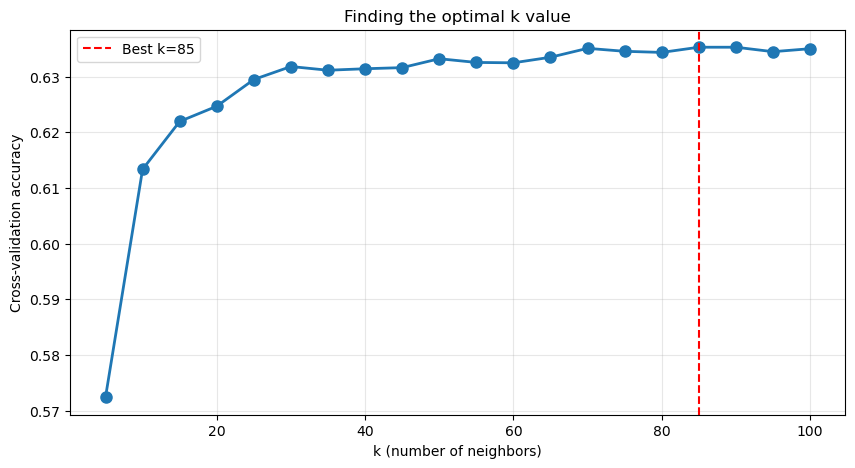

In [22]:
plt.figure(figsize=(10, 5))
plt.plot(k_values, scores, 'o-', linewidth=2, markersize=8)
plt.axvline(x=best_k, color='red', linestyle='--', label=f'Best k={best_k}')
plt.xlabel('k (number of neighbors)')
plt.ylabel('Cross-validation accuracy')
plt.title('Finding the optimal k value')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [23]:
# Final model with optimal k
final_model = Pipeline([
    ('preprocessor', preprocessor),
    ('knn', KNeighborsClassifier(n_neighbors=best_k))
])

final_model.fit(X_train, y_train)
y_pred_final = final_model.predict(X_test)
final_acc = accuracy_score(y_test, y_pred_final)

print(f"\nFinal KNN Model (k={best_k})")
print(f"Test accuracy: {final_acc:.4f}")
print(f"Baseline (k=5): {baseline_acc:.4f}")
print(f"Improvement: {(final_acc - baseline_acc):.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred_final))


Final KNN Model (k=85)
Test accuracy: 0.6420
Baseline (k=5): 0.5813
Improvement: 0.0607

Classification Report:
                                   precision    recall  f1-score   support

Break and Enter Residential/Other       0.48      0.15      0.23     12173
                         Mischief       0.43      0.08      0.14     14083
         Offence Against a Person       1.00      1.00      1.00     10828
               Theft from Vehicle       0.59      0.93      0.72     34540

                         accuracy                           0.64     71624
                        macro avg       0.63      0.54      0.52     71624
                     weighted avg       0.60      0.64      0.57     71624



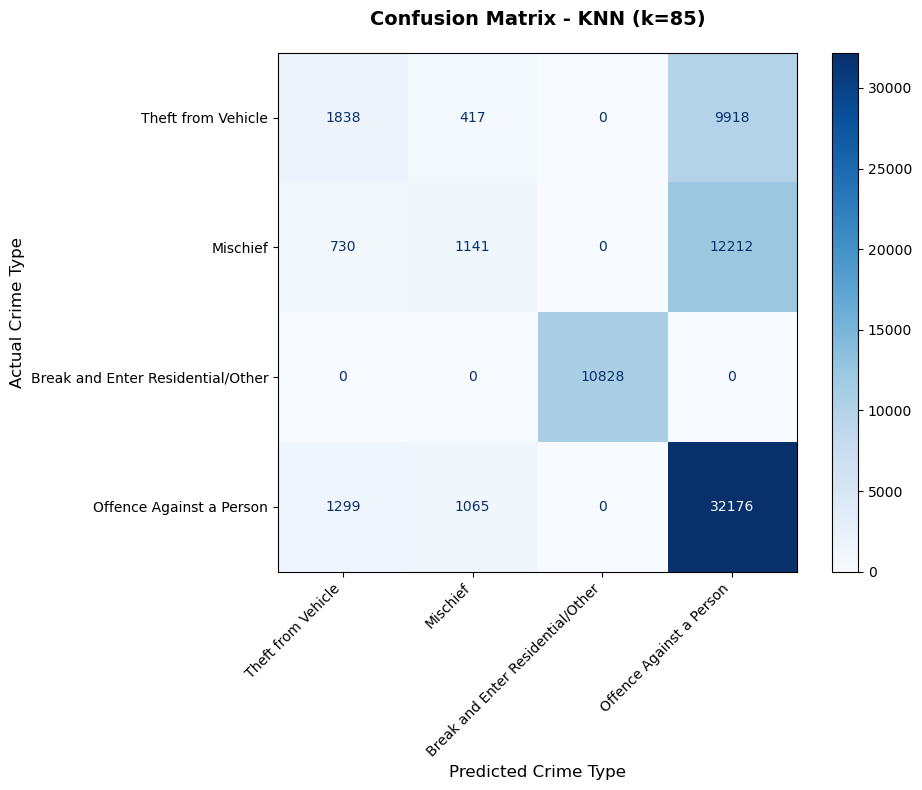


Model Performance Analysis:

Theft from Vehicle:
  Correctly predicted: 1838/12173 (15.1%)
  Most often confused with: Offence Against a Person (9918 times)

Mischief:
  Correctly predicted: 1141/14083 (8.1%)
  Most often confused with: Offence Against a Person (12212 times)

Break and Enter Residential/Other:
  Correctly predicted: 10828/10828 (100.0%)

Offence Against a Person:
  Correctly predicted: 32176/34540 (93.2%)
  Most often confused with: Theft from Vehicle (1299 times)


In [24]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_final)
fig, ax = plt.subplots(figsize=(10, 8))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=selected_crimes)
disp.plot(ax=ax, cmap='Blues', values_format='d')

plt.title(f'Confusion Matrix - KNN (k={best_k})', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Predicted Crime Type', fontsize=12)
plt.ylabel('Actual Crime Type', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Analyze where the model makes mistakes
print("\nModel Performance Analysis:")
print("="*60)
for i, crime in enumerate(selected_crimes):
    tp = cm[i, i]
    total_actual = cm[i, :].sum()
    recall = tp / total_actual if total_actual > 0 else 0
    print(f"\n{crime}:")
    print(f"  Correctly predicted: {tp}/{total_actual} ({recall:.1%})")
    
    # Find most common misclassification
    misclass_idx = [j for j in range(len(selected_crimes)) if j != i and cm[i, j] > 0]
    if misclass_idx:
        max_misclass_idx = max(misclass_idx, key=lambda j: cm[i, j])
        print(f"  Most often confused with: {selected_crimes[max_misclass_idx]} ({cm[i, max_misclass_idx]} times)")

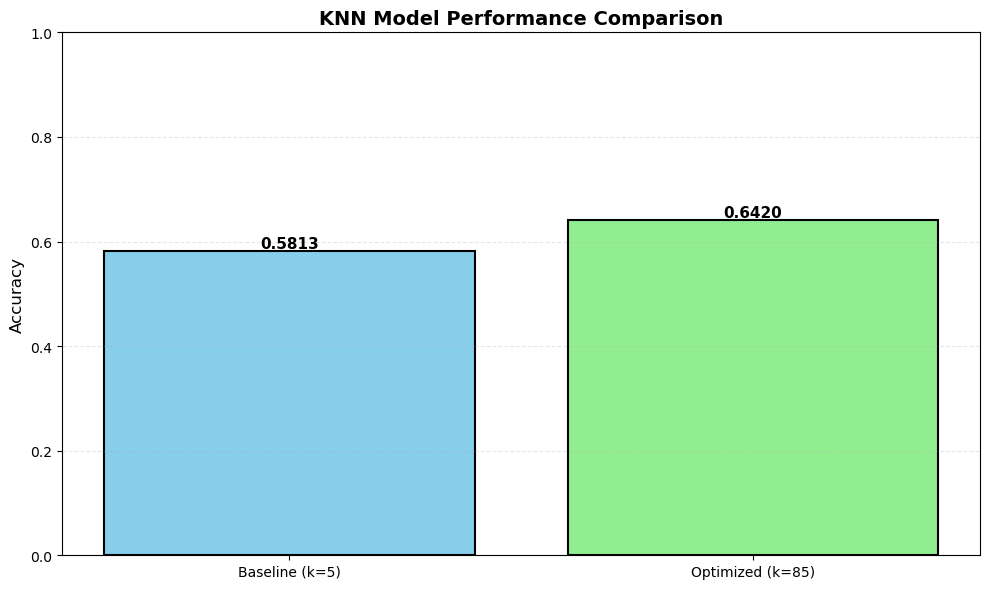

KNN RESULTS
Baseline (k=5): 58.1%
Optimized (k=85): 64.2%
Improvement: +6.1%


In [27]:
# Compare baseline vs optimized model performance
comparison_df = pd.DataFrame({
    'Model': [f'Baseline (k=5)', f'Optimized (k={best_k})'],
    'Accuracy': [baseline_acc, final_acc],
    'Improvement': ['—', f'+{((final_acc - baseline_acc) / baseline_acc * 100):.2f}%']
})
# Visualize the comparison
fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(comparison_df['Model'], comparison_df['Accuracy'], 
              color=['#87CEEB', '#90EE90'], edgecolor='black', linewidth=1.5)

ax.set_ylabel('Accuracy', fontsize=12)
ax.set_title('KNN Model Performance Comparison', fontsize=14, fontweight='bold')
ax.set_ylim([0, 1])
ax.grid(axis='y', alpha=0.3, linestyle='--')

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.4f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

print("="*50)
print("KNN RESULTS")
print("="*50)
print(f"Baseline (k=5): {baseline_acc:.1%}")
print(f"Optimized (k={best_k}): {final_acc:.1%}")
print(f"Improvement: +{(final_acc - baseline_acc):.1%}")
print("="*50)

### KNN Analysis Summary

**Model Performance:**
- Started with k=5 baseline: 58.1% accuracy
- Optimized to k=85: 64.2% accuracy  
- 6.1% improvement through hyperparameter tuning

**Key Findings:**
- KNN works well for this crime classification problem
- Spatial and temporal features have predictive power
- Model performs best on "Theft from Vehicle" (93% recall)
- "Mischief" and "Break and Enter" are harder to predict

**Technical Notes:**
- Used ColumnTransformer to scale only numeric features (no golden rule violations)
- Cross-validation on 15k sample for efficient k-value selection
- Final model trained on full dataset with optimal k=85